In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

api_key = "4a60fcfe3a762ea4e4d9276f8944aa76"

In [3]:
#U.S. Crude Oil Production, Annual
url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.COPRPUS.A"
coal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTSPUS_TON.A"


In [4]:
print(requests.get(url))

<Response [200]>


In [5]:
response = requests.get(url).json()
coal_response = requests.get(coal_url).json()

In [6]:
print(json.dumps(response, indent=2, sort_keys=True))

{
  "request": {
    "command": "series",
    "series_id": "STEO.COPRPUS.A"
  },
  "series": [
    {
      "copyright": "None",
      "data": [
        [
          "2020",
          13.201070874
        ],
        [
          "2019",
          12.410303835
        ],
        [
          "2018",
          10.956129291
        ],
        [
          "2017",
          9.351714589
        ],
        [
          "2016",
          8.8306689481
        ],
        [
          "2015",
          9.4306517096
        ],
        [
          "2014",
          8.7585999452
        ],
        [
          "2013",
          7.4669328575
        ],
        [
          "2012",
          6.5015147541
        ],
        [
          "2011",
          5.6542695288
        ],
        [
          "2010",
          5.4776768329
        ],
        [
          "2009",
          5.3490960849
        ],
        [
          "2008",
          4.999670847
        ],
        [
          "2007",
          5.0739002
    

In [7]:
years = []
values = []

for x in response["series"][0]["data"]:
    years.append(x[0])
    values.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
values = values[::-1]

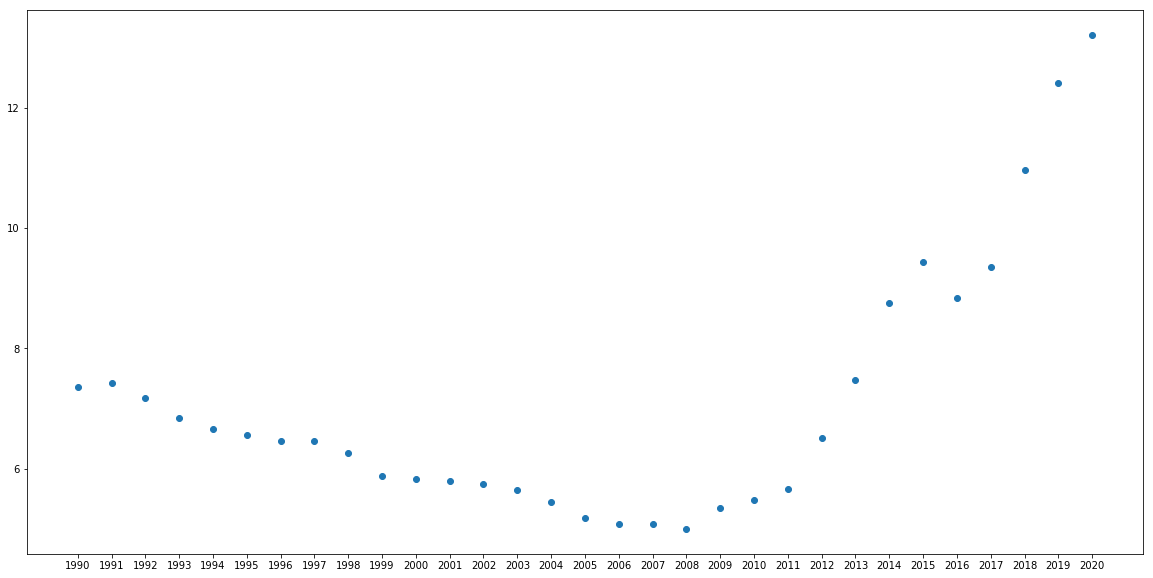

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(years, values)


#plt.grid(True)

plt.show()

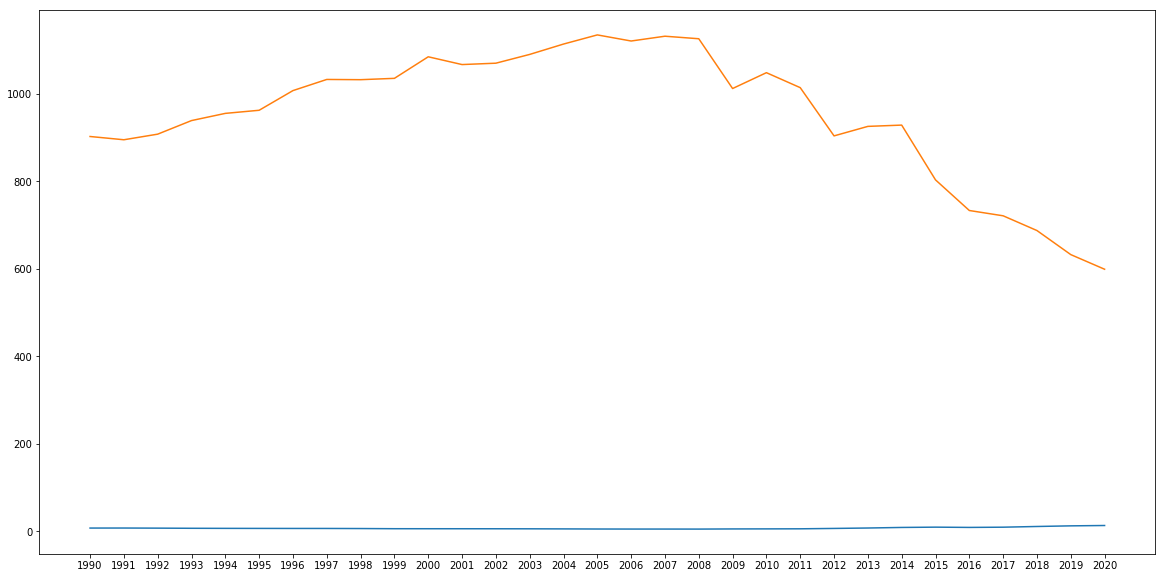

In [9]:
coal_years = []
coal_values = []

for x in coal_response["series"][0]["data"]:
    coal_years.append(x[0])
    coal_values.append(x[1])
    
#values = response["series"][0]["data"][1]
coal_years  = coal_years[::-1]
coal_values = coal_values[::-1]



plt.figure(figsize=(20,10))
plt.plot(years, values)
plt.plot(years, coal_values)



plt.show()

In [18]:
# US Renewable Energy Supply

renewable_urls = []
renewable_Net_Capacity = []
renewable_years = []
i = 0

renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GEEPCAP_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVEPCAP_US.A")

for renew_url in renewable_urls:
    renewable_response = requests.get(renew_url).json()
    #renewable_Net_Capacity.append(i)
    renewable_Net_Capacity.append([])
    renewable_years.append([])
    for response in renewable_response["series"][0]["data"]:
        renewable_Net_Capacity[i].append(response[1])
        renewable_years[i].append(response[0])
    renewable_Net_Capacity[i] = renewable_Net_Capacity[i][::-1]
    renewable_years[i] = renewable_years[i][::-1]
    print(len(renewable_Net_Capacity[i]))
    i += 1


    

20
20
20
20


In [19]:
renewable_Net_Capacity

[[3893.64,
  4416.64,
  6001.79,
  6463.7,
  8719.17,
  11350.75,
  16515.1,
  24651.3,
  34294.6,
  39121.4,
  45647,
  59036.3,
  59922.5,
  64155.6,
  72486.3,
  81198,
  87488.4,
  94657,
  105249.7,
  113651.5],
 [391.6,
  396.9,
  397.3,
  398.1,
  411.1,
  411.1,
  500.5,
  534.5,
  617.4,
  857.8,
  1465,
  3062.9,
  6421.9,
  10092.2,
  13374.2,
  21630.6,
  26432.1,
  31679.4,
  36362.9,
  43073.8],
 [2217.01,
  2254.25,
  2135.25,
  2163.88,
  2297.1,
  2294.78,
  2214.2,
  2228.8,
  2381.9,
  2404.6,
  2409.2,
  2592.1,
  2607,
  2514.3,
  2541.5,
  2516.6,
  2485.6,
  2499.3,
  2507.2,
  2622.1],
 [77844.57,
  78297.34,
  77901.2,
  77196.86,
  77112.83,
  77363.87,
  77523.3,
  77574.5,
  78159.3,
  78101.3,
  77721.4,
  78073.7,
  78521.7,
  79376.6,
  79385.5,
  79556.2,
  79431.6,
  79533.1,
  79537.6,
  79763]]

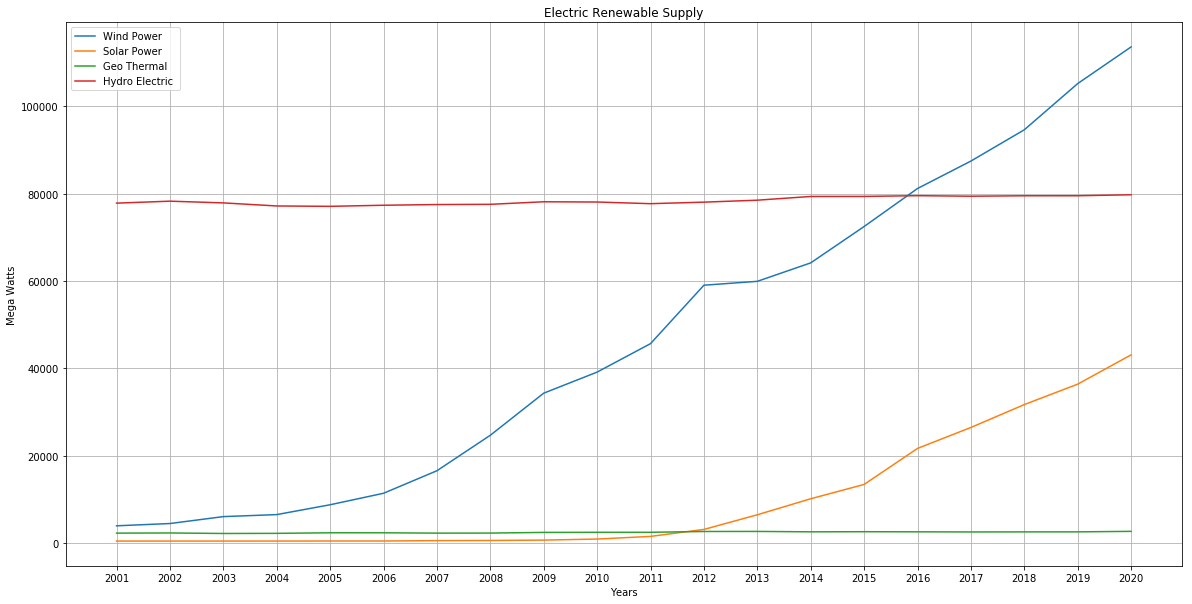

In [35]:
plt.figure(figsize=(20,10))
plt.plot(renewable_years[0], renewable_Net_Capacity[0], label="Wind Power")
plt.plot(renewable_years[0], renewable_Net_Capacity[1], label="Solar Power")
plt.plot(renewable_years[0], renewable_Net_Capacity[2], label="Geo Thermal")
plt.plot(renewable_years[0], renewable_Net_Capacity[3], label="Hydro Electric ")
plt.xlabel("Years")
plt.ylabel("Mega Watts")
plt.title("Electric Renewable Supply")

plt.legend()
plt.grid(True)

plt.show()

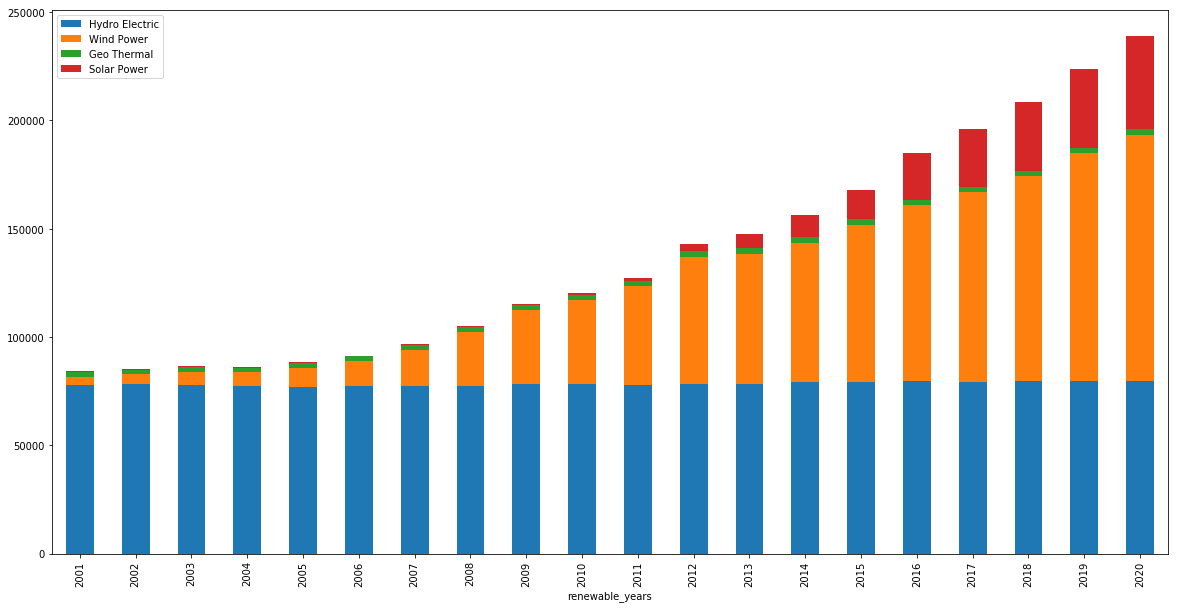

In [31]:

renewable_supply_df = pd.DataFrame({
    'renewable_years' : renewable_years[0],
    'Hydro Electric' : renewable_Net_Capacity[3],    
    'Wind Power' : renewable_Net_Capacity[0],
    'Geo Thermal' : renewable_Net_Capacity[2],
    'Solar Power' : renewable_Net_Capacity[1]
    
})

renewable_supply_df.head()

renewable_supply_df = renewable_supply_df.set_index('renewable_years')

#renewable_supply_pt = renewable_supply_df.pivot('renewable_years', 'Wind Power', 'Solar Power')

#plt.figure(figsize=(20,10))
renewable_supply_df.plot(kind='bar', stacked=True, figsize=(20,10))

#renewable_supply_df.groupby(['renewable_years'])['Wind Power'].size().unstack().plot(kind='bar',stacked=True)
#plt.show()


#plt.bar(renewable_years[0] , renewable_Net_Capacity[0], stacked=True)